In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Dataset/Decision_Tree_ Dataset.csv")
print(df)

       1      2    3     4    sum Result
0    201  10018  250  3046  13515    yes
1    205  10016  395  3044  13660    yes
2    257  10129  109  3251  13746    yes
3    246  10064  324  3137  13771    yes
4    117  10115  496  3094  13822    yes
..   ...    ...  ...   ...    ...    ...
995  413  14914  523  4683  20533     No
996  359  14423  927  4838  20547     No
997  316  14872  613  4760  20561     No
998  305  14926  897  4572  20700     No
999  168  14798  834  4937  20737     No

[1000 rows x 6 columns]


In [2]:
print("dataset length : ",len(df))
print("dataset shape : ",df.shape)
df.head()

dataset length :  1000
dataset shape :  (1000, 6)


,1,2,3,4,sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [3]:
x = df.drop(['sum','Result'],axis='columns')
y = df['Result']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=23)
print(x_train)

       1      2    3     4
522  487  11344  648  4999
484  424  12687  140  4035
182  277  11011  879  3518
274  468  11172  788  3823
361  485  12291  820  3025
..   ...    ...  ...   ...
950  187  14561  302  4797
969  300  14164  880  4711
40   144  10529  114  3700
742  342  13845  158  4220
595  448  13109  774  3472

[600 rows x 4 columns]


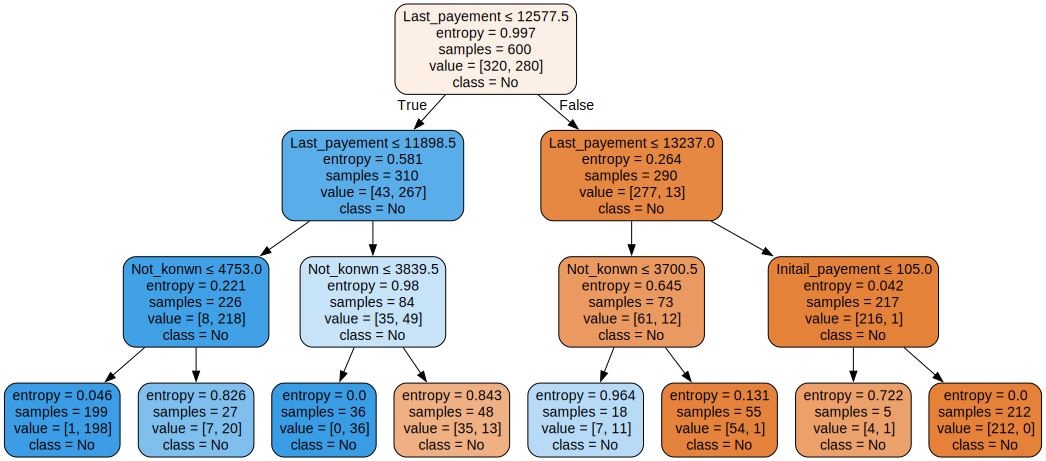

In [10]:
from sklearn import tree
import graphviz

clf_entropy = tree.DecisionTreeClassifier(criterion="entropy",random_state=23,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
features_name = ['Initail_payement','Last_payement','Credit_score','Not_konwn']

dot_data = tree.export_graphviz(clf_entropy,out_file=None,feature_names=features_name,class_names=y_train,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

In [6]:
y_predict = clf_entropy.predict(x_test)
print("size: ",len(y_predict))
y_predict

size:  400


array(['No', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes',
       'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'No', 'yes', 'No', 'No', 'No', 'No', 'No', 'yes',
       'No', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes',
       'No', 'No', 'yes', 'No', 'No', 'No', 'No', 'yes', 'No', 'yes',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'yes',
       'No', 'No', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'No', 'yes', 'No', 'yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes', 'No',
       'yes', 'No', 'yes', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes',
       'No', 'No', 'yes', 'No', 'No', 'No', 'No', 'yes', 'No'

In [7]:
from sklearn.metrics import accuracy_score  

print("Accuracy is : ",accuracy_score(y_test,y_predict)*100)

Accuracy is :  94.25
